# Ejercicio 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

In [2]:
SQUARE_SIDE = 10
CENTER = (20, 20)
N=10000

In [3]:
# Contraint points within the four linear functions that define the shape.
# Y1 >= -X + 32.928
# Y2 <= -X + 47.071
# Y3 >= X - 7.071
# Y4 <= X + 7.071
def constrained_points(x, y):
    X = []
    Y = []

    for i in range(N):
        if (y[i] >= -x[i] + 32.928) and (y[i] <= -x[i] + 47.071) and (y[i] >= x[i] - 7.071) and (y[i] <= x[i] + 7.071):
            X.append(x[i])
            Y.append(y[i])
    
    return X, Y

In [4]:
# Renders a batch of points using the provided random function,
def render(f):
    square_diagonal = SQUARE_SIDE * sqrt(2)

    min_x = CENTER[0] - (square_diagonal / 2)
    max_x = CENTER[0] + (square_diagonal / 2)

    min_y = CENTER[1] - (square_diagonal / 2)
    max_y = CENTER[1] + (square_diagonal / 2)

    x=f(low=min_x, high=max_x, size=N)
    y=f(low=min_y, high=max_y, size=N)

    X, Y = constrained_points(x, y)

    plt.xlim(10, 30)
    plt.ylim(10, 30)
    plt.scatter(X, Y, s=1)
    plt.figtext(.25, .82, "Factor de Rendimiento: {}/{} = {}".format(len(X) + len(Y), 
                                                                   len(x) + len(y), 
                                                                   (len(X) + len(Y)) / (len(x) + len(y))))
    plt.show()

## A)

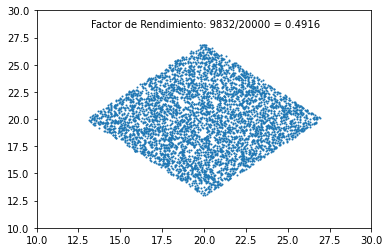

In [5]:
render(np.random.uniform)

## B)

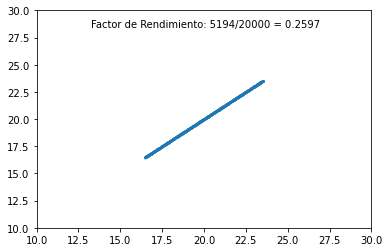

In [6]:
mod = 2**32 
multiplier = 1013904223
increment = 1664525
seed = int((97771 + 95637 + 99288 + 95605) / 4)

numsGen = {}
numsGen[0] = seed

def GCL(n):
    if (n in numsGen) :
        return numsGen[n]
    else:
        numsGen[n] = (multiplier*GCL(n-1) + increment) % mod
        return numsGen[n]

def GCL_wrapper(low, high, size):
    X = []
    
    for i in range(size):
        X.append(low + GCL(i) % high)
    
    return X

render(GCL_wrapper)